<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_3_Spectral_Clustering_and_K_Medoids_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 3: Spectral Clustering and K-Medoids Clustering
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances

In [2]:
# Setting Random Seed for Reproducibility
np.random.seed(42)

In [3]:
# Creating the First Dataset for Spectral Clustering
X1, y1 = make_moons(n_samples=300, noise=0.08)

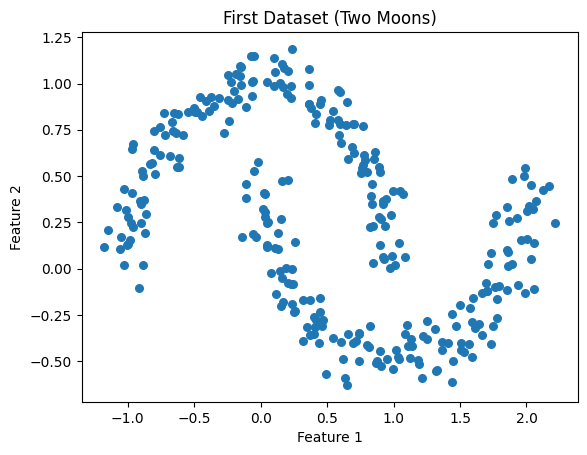

In [4]:
# Visualizing the First Dataset
plt.scatter(X1[:, 0], X1[:, 1], s=30)
plt.title("First Dataset (Two Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Applying Spectral Clustering
spectral = SpectralClustering(
    n_clusters=2,
    affinity='nearest_neighbors',
    random_state=42
)

labels_spectral = spectral.fit_predict(X1)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [6]:
# Applying K-Means Clustering
kmeans1 = KMeans(n_clusters=2, random_state=42)
labels_kmeans1 = kmeans1.fit_predict(X1)

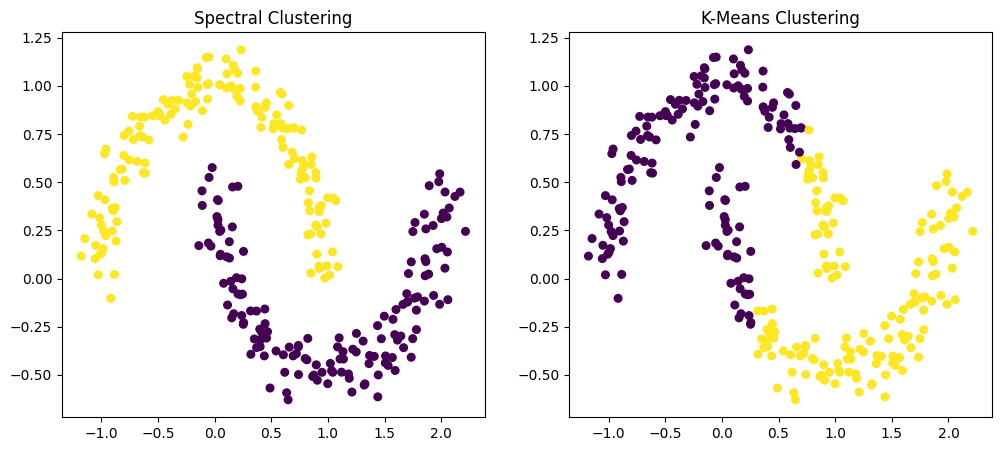

In [7]:
# Visualizing Clustering Results-First Dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=labels_spectral, s=30)
plt.title("Spectral Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], c=labels_kmeans1, s=30)
plt.title("K-Means Clustering")

plt.show()

In [8]:
# Creating Second Dataset for K-Medoids
X2, y2 = make_blobs(
    n_samples=400,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

In [13]:
# Applying K-Means Clustering - Second Dataset
kmeans2 = KMeans(n_clusters=4, random_state=42)
labels_kmeans2 = kmeans2.fit_predict(X2)

In [14]:
# Implementing K-Medoids Clustering
def k_medoids(X, k, max_iter=100):
    n = X.shape[0]
    medoids = np.random.choice(n, k, replace=False)
    distances = pairwise_distances(X)

    for _ in range(max_iter):
        labels = np.argmin(distances[:, medoids], axis=1)
        new_medoids = []

        for i in range(k):
            cluster_points = np.where(labels == i)[0]
            if len(cluster_points) == 0:
                new_medoids.append(medoids[i])
            else:
                intra_distances = distances[np.ix_(cluster_points, cluster_points)]
                new_medoids.append(cluster_points[np.argmin(intra_distances.sum(axis=1))])

        new_medoids = np.array(new_medoids)
        if np.all(new_medoids == medoids):
            break
        medoids = new_medoids

    return labels, medoids

In [15]:
# Applying K-Medoids
labels_kmedoids, medoids = k_medoids(X2, k=4)

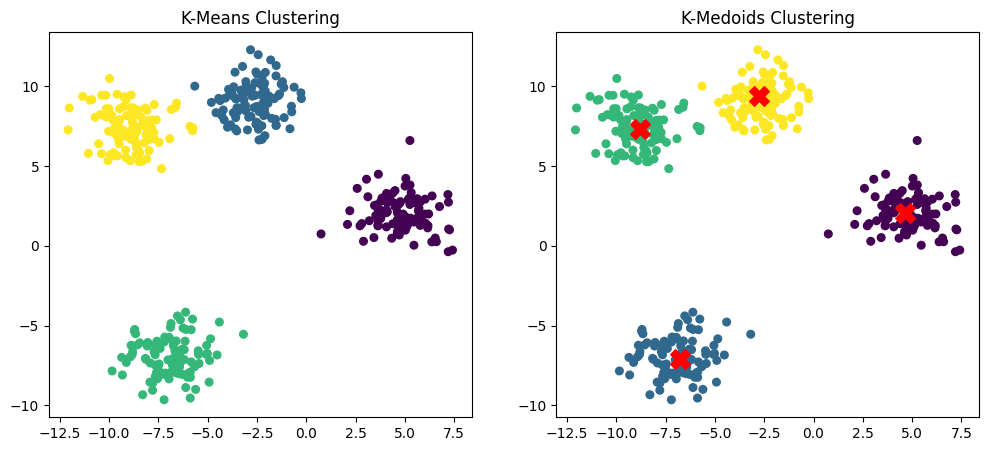

In [16]:
# Visualizing Clustering Results - Second Dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2[:, 0], X2[:, 1], c=labels_kmeans2, s=30)
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=labels_kmedoids, s=30)
plt.scatter(X2[medoids, 0], X2[medoids, 1], c='red', marker='X', s=200)
plt.title("K-Medoids Clustering")

plt.show()